# SEZ Linear Regression Project
## Collaborators
### Tayler Shaw
### Rhea Bhutada
#### 11/12/21 - In progess

In [ ]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import sqrt

## Goals for this Notebook

Import the data

Need growth rates (fits.csv) data from the Mean Lights

Need SEZ Data (imported by metatab.librayr)

Join the two on the Unique_Id lab

Encode categorical data 

run regressions on country

run regression on individual features from the feature importance in comparisons to growth rate 



# Data

## 'sez_df' Dataframe
The 'sez_df' dataframe contains the information pertaining to the SEZ's. This includes in information about the municipalities, SEZ size, distance from other cities, and the policies and management types of the SEZ, among many other variables. This dataframe contains our independent variables, and contributing features for why an SEZ may or may not be successful. 

In [ ]:
# Main SEZ file
sez_df =  pd.read_csv('http://library.metatab.org/worldbank.org-sez-1.1.1/data/sez.csv')

# The operational date col is a string, so make an int year column. 
sez_df['op_year'] = pd.to_numeric(sez_df.operational_date, errors='coerce')

# This gives us more information explaining what is inside this dataframe
sez_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      584 non-null    int64  
 1   unique_id               584 non-null    object 
 2   check                   584 non-null    object 
 3   latitude                584 non-null    float64
 4   longitude               584 non-null    float64
 5   country_code            584 non-null    object 
 6   country_type_combo      584 non-null    object 
 7   region                  584 non-null    object 
 8   country                 584 non-null    object 
 9   zone_type               584 non-null    object 
 10  zone_name               584 non-null    object 
 11  operational_date        584 non-null    object 
 12  size                    584 non-null    object 
 13  management_type         584 non-null    object 
 14  management_company      584 non-null    ob

In [ ]:
sez_df.head()

,id,unique_id,check,latitude,longitude,country_code,country_type_combo,region,country,zone_type,zone_name,operational_date,size,management_type,management_company,legal_framework,legalframework_type,legalframework_year,regulatory_authority,authority_independence,private_participation,private_participation2,developer_incentive,decade_ofoperation,size_range,standard_corptax,corptax_type,corptax_exemp,corptax_duration,corptax_grace,total_duration,duration_type,investment_min,export_min,req_other,importduty_type,importduty_input,input_duration,importduty_capex,capex_duration,repatriation,capital_gains,withholding,property_land,vat_sales,employment,other,nearest_port,nearest_portdist,nearest_airport,nearest_airportdist,populous_city,populous_citydist,city_1m,city_1mdist,city_500k,city_500kdist,500kcity_range,city_300k,city_300kdist,note,geometry,op_year
0,0,URY12,URY,-33.887443,-58.416899,URY,URYFree Zone,LAC,Uruguay,Free Zone,Nueva Palmira Free Zone,1923,100,Public agency,Government of Uruguay,"Law 15,921 on Free Zones",Dedicated SEZ law,1987,National Free Zones Bureau,Yes,Development and operation,Concession arrangement offered by the Governme...,No established framework,Before 1960,100 to 299 ha,25%,Absolute exemption,100% exempt,Perpetual,N/a,Perpetual,Perpetual,None,0%,Only allows 25% foreign employment,100% exempt on both inputs and capex,100% exempt,Perpetual,100% exempt,Perpetual,No exemption,No exemption,100% exempt from dividend tax,No exemption,100% exempt from VAT,No exemption,100% exempt from wealth tax,Port of Nueva Palmira,2,Carrasco International Airport (Montevideo),285,Montevideo,265,Montevideo,265,Montevideo,265,50 to 299 km,Montevideo,265,NaN,POINT (-58.416899 -33.887443),1923.0
1,1,URY2,URY,-34.470636,-57.831424,URY,URYFree Zone,LAC,Uruguay,Free Zone,Colonia Free Zone,1923,22,Private management,Grupo Continental Zona Franca S.A.,"Law 15,921 on Free Zones",Dedicated SEZ law,1987,National Free Zones Bureau,Yes,Development and operation,Concession arrangement offered by the Governme...,No established framework,Before 1960,Less than 30 ha,25%,Absolute exemption,100% exempt,Perpetual,N/a,Perpetual,Perpetual,None,0%,Only allows 25% foreign employment,100% exempt on both inputs and capex,100% exempt,Perpetual,100% exempt,Perpetual,No exemption,No exemption,100% exempt from dividend tax,No exemption,100% exempt from VAT,No exemption,100% exempt from wealth tax,Port of Colonia,2,Carrasco International Airport (Montevideo),202,Montevideo,182,Montevideo,182,Montevideo,182,50 to 299 km,Montevideo,182,NaN,POINT (-57.831424 -34.470636),1923.0
2,2,COL2,COL,10.960451,-74.762902,COL,COLFree Industrial Zone,LAC,Colombia,Free Industrial Zone,Barranquilla Free Trade Zone,1958,100,Private management,Zona Franca Barranquilla S.A.,Law 1004/2005 Decree 383 and 4051,Dedicated SEZ law,2007,Comision Intersectorial de Zonas Francas,No,"Designation, development, and operation",Through application to the authority,Yes,Before 1960,100 to 299 ha,25%,Reduced fixed-rate,Reduced fixed-rate at 20%,Perpetual,N/a,Perpetual,Perpetual,$0 - $2.4M in first three years depending on s...,0%,Must employ 0 to 50 nationals in first three y...,100% exempt on both inputs and capex,100% exempt,Perpetual,100% exempt,Perpetual,No exemption,No exemption,No exemption,No exemption,No exemption,No exemption,Reduction of municipal taxes,Port of Barranquilla,2,Aeropuerto Internacional Ernesto Cortissoz (Ba...,13,Bogota,1013,Barranquilla,6,Barranquilla,6,Less than 50 km,Barranquilla,6,NaN,POINT (-74.762902 10.960451),1958.0
3,3,GUY3,GUY,6.791794,-58.167016,GUY,GUYIndustrial Estate,LAC,Guyana,Industrial Estate,Ruimveldt Industrial Estate,1960,13,State-owned enterprise,National Industry and Commercial Investment Ltd,No active legal framework,No active legal framework,No active legal framework,"Ministry of Industry, Tourism, and Commerce",No,No active legal framework,No active legal framework,No active legal framework,1960 to 1969,Less than 30 ha,40%,No exemption,No exemp

## 'mean_lights_df' Dataframe
The "mean_lights_df" contains the mean value for the luminosity for each individual SEZ. The buffer is the the circle that encapsulates the area around the SEZ. That buffer contains pixels taken from satellite imaging of the night time lights. Each pixels value of those lights are then used to find the mean value of the illuminosity of the SEZ. 

### Explanation of Column Data
  unique_id: unique id relating to an individual SEZ

  buffer_pix_sum: Sum of all the pixels values within the buffer (circle around SEZ)

  buffer_pix_count: The number of pixels within the buffer (circle around SEZ)

  ring_pix_sum: Sum of all pixel value within the ring (ring outside SEZ)

  ring_pix_count: The number of pixels with the ring (ring outside SEZ)

  buffer_area : Area of the buffer (same as ring)

  ring_area	radius L  Area of the ring (same as buffer)

NOTE: There is a good likelihood that a raster mapping of the SEZ that only uses the true area of the SEZ by cutting out the actual borderlines of the SEZ may be more representative of the actual illuminosity for that SEZ and that the circle may be including to much extraneous area outside of the SEZ> 

In [ ]:
# Nighttime Lights summaries
mean_lights_df =  pd.read_csv('http://library.metatab.org/sandiegodata.org-sez_lights-1.1.1/data/mean_lights.csv')

# Calculates the mean value of pixel value regarding to illuminosity for both the ring and the buffer
mean_lights_df['mean_buffer'] = mean_lights_df["buffer_pix_sum"] / mean_lights_df["buffer_pix_count"]
mean_lights_df['mean_ring'] = mean_lights_df["ring_pix_sum"] / mean_lights_df["ring_pix_count"]
mean_lights_df.head()

,year,unique_id,buffer_pix_sum,buffer_pix_count,ring_pix_sum,ring_pix_count,buffer_area,ring_area,radius,mean_buffer,mean_ring
0,1992,URY12,346,110,109,238,7.841371e+07,7.841371e+07,5000,3.145455,0.457983
1,1993,URY12,753,110,158,238,7.841371e+07,7.841371e+07,5000,6.845455,0.663866
2,1994,URY12,748,110,180,238,7.841371e+07,7.841371e+07,5000,6.800000,0.756303
3,1995,URY12,969,110,140,238,7.841371e+07,7.841371e+07,5000,8.809091,0.588235
4,1996,URY12,1076,110,169,238,7.841371e+07,7.841371e+07,5000,9.781818,0.710084


## 'growth_rates' Dataframe
This dataframe contains the growthrates previously computed in erics notebook found within the mean_lights notebook. I have it saved into my google sheets and the following code allows you import a google sheet as a pandas dataframe

This snippet of code below was found here
https://colab.research.google.com/notebooks/snippets/sheets.ipynb#scrollTo=JiJVCmu3dhFa

In [ ]:
# from google.colab import auth
# auth.authenticate_user()

# import gspread
# from oauth2client.client import GoogleCredentials

# gc = gspread.authorize(GoogleCredentials.get_application_default())

# worksheet = gc.open('fits').sheet1

# # get_all_values gives a list of rows.
# rows = worksheet.get_all_values()
# print(rows)

# # Convert to a DataFrame and render.
# import pandas as pd
# growth_rates = pd.DataFrame.from_records(rows)

In [ ]:
# # Fix Column Names Here, this replaces the columns names with the value in the first row, then slices the dataframe down size
# # elimintating the first row and keeping on the rows below it. 
# growth_rates.columns = growth_rates.iloc[0] 
# growth_rates = growth_rates[1:]
# growth_rates.head()

In [ ]:
import requests
import io 

url = 'https://raw.githubusercontent.com/TaylerShaw/SEZ_data/main/growth_rates.csv'

read_data = requests.get(url).content
growth_rates = pd.read_csv(io.StringIO(read_data.decode('utf-8')))
growth_rates

,Unnamed: 0,unique_id,radius,pre_buf_r,pre_buf_x0,pre_ring_r,pre_ring_x0,post_buf_r,post_buf_x0,post_ring_r,post_ring_x0,total_ring_r,total_ring_x0,buff_diff_growth,ring_diff_growth,ring_buff_diff
0,0,AGO1,10000,0.131032,4.690000e-104,0.118595,1.290000e-94,0.015247,1.150000e-09,0.037349,1.330000e-28,0.120008,1.050000e-95,-0.115785,-0.081247,-0.034538
1,1,ARG1,10000,0.001377,6.654708e+02,0.014834,1.280000e-09,0.011401,1.630000e-06,0.015338,4.810000e-10,0.015838,1.790000e-10,0.010024,0.000504,0.009520
2,3,ARG3,10000,0.046342,3.840000e-36,0.021097,7.000000e-15,0.021681,2.050000e-15,0.015546,3.690000e-10,0.015563,3.570000e-10,-0.024661,-0.005551,-0.019110
3,4,ARG4,10000,0.056387,1.710000e-44,0.041572,1.580000e-32,0.025571,7.500000e-19,0.026365,7.620000e-20,0.019228,9.570000e-14,-0.030816,-0.015207,-0.015609
4,5,ARG5,10000,0.055995,6.220000e-44,0.041117,8.070000e-32,0.024795,6.000000e-18,0.027553,1.850000e-20,0.027565,1.810000e-20,-0.031200,-0.013563,-0.017636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,579,VNM97,10000,0.106486,5.250000e-85,0.104235,2.550000e-83,0.061184,1.210000e-48,0.057329,1.480000e-45,0.074461,1.360000e-59,-0.045301,-0.046905,0.001604
397,580,VNM98,10000,0.112957,3.900000e-90,0.110063,5.120000e-88,0.063233,2.150000e-50,0.048106,4.480000e-38,0.069481,1.060000e-55,-0.049725,-0.061958,0.012233
398,581,ZAF1,10000,0.033396,1.210000e-25,0.038558,6.290000e-30,0.057629,8.830000e-46,0.018705,3.370000e-13,0.019021,1.810000e-13,0.024233,-0.019853,0.044086
399,582,ZAF2,10000,0.014510,2.090000e-09,0.016460,3.040000e-11,0.022486,3.070000e-16,0.021969,5.420000e-16,0.013839,5.180000e-09,0.007976,0.005509,0.002468


In [ ]:
growth_rates.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        401 non-null    int64  
 1   unique_id         401 non-null    object 
 2   radius            401 non-null    int64  
 3   pre_buf_r         401 non-null    float64
 4   pre_buf_x0        401 non-null    float64
 5   pre_ring_r        401 non-null    float64
 6   pre_ring_x0       401 non-null    float64
 7   post_buf_r        401 non-null    float64
 8   post_buf_x0       401 non-null    float64
 9   post_ring_r       401 non-null    float64
 10  post_ring_x0      401 non-null    float64
 11  total_ring_r      401 non-null    float64
 12  total_ring_x0     401 non-null    float64
 13  buff_diff_growth  401 non-null    float64
 14  ring_diff_growth  401 non-null    float64
 15  ring_buff_diff    401 non-null    float64
dtypes: float64(13), int64(2), object(1)
memory u

In [ ]:
# All the 
#Taking all columns excluding unique ID, which needs to stay a str.
cols = growth_rates.columns.drop('unique_id')
# Convert all columns to numeric 
growth_rates[cols] = growth_rates[cols].apply(pd.to_numeric, errors='coerce')

### Explanation of Column Data

unique_id: Unique Id of individual SEZ 

radius: The raidus of the circle around the SEZ

pre_buf_r: The growth rate of illuminosity within the buffer (circle around the SEZ) before the SEZ was established. 

pre_buf_x0: position of the buffer

pre_ring_r: The growth rate of illuminosity within the ring (ring outside the SEZ) before the SEZ was established.

pre_ring_x0: position of the ring

post_buf_r: The growth rate of illuminosity within the buffer (circle around the SEZ) after the SEZ was established.

post_buf_x0: position of the buffer

post_ring_r: The growth rate of illuminosity within the ring (ring outside the SEZ) after the SEZ was established.

post_ring_x0: position of the ring

total_ring_r: total growth rate 

total_ring_x0: position of the ring

buff_diff_growth: buffers difference in growth rate 

ring_diff_growth: rings difference in growth rate 

ring_buff_diff: difference between ring and buffer. 


In [ ]:
# Next we need to find the Differences in Difference of the growth rates

### Differences in Differences
Difference in differences is a statistical technique used in econometrics and quantitative research in the social sciences that attempts to mimic an experimental research design using observational study data, by studying the differential effect of a treatment on a 'treatment group' versus a 'control group' in a natural experiment. It calculates the effect of a treatment (i.e., an explanatory variable or an independent variable) on an outcome (i.e., a response variable or dependent variable) by comparing the average change over time in the outcome variable for the treatment group to the average change over time for the control group. Although it is intended to mitigate the effects of extraneous factors and selection bias, depending on how the treatment group is chosen, this method may still be subject to certain biases (e.g., mean regression, reverse causality and omitted variable bias).


In [ ]:

# Buffer = circle area around SEZ
# Ring = ring area outside of the SEZ
# Both the ring and the buffer are equal area sizes 

# differences & differences of buffer and ring  = (post Buffer growth rate  - pre buffer growth rate) - (post ring growth rate - pre ring growth rate)
growth_rates['DD'] = (growth_rates.post_buf_r - growth_rates.pre_buf_r) - (growth_rates.post_ring_r - growth_rates.pre_ring_r)

### Explanation of Dependent Variable of Difference in Difference of Growth Rates of the illuminosity of the lights within the SEZ
We took the growth rates of the night time light before the SEZ was established and the growth rates after the SEZ was established. We want to see what the value of the growth rates was after the SEZ was established. 

The hypothesis would be, if we had a successful SEZ we would expect to have a big positive value (a big increase of lights) after the SEZ was established. Conversely, we would expect to see negative values if the SEZ was not successful. Values close to 0 indicates no change, and therefore no impact of the establishment of that SEZ. 

In order to reduce extraneous variables and possible confounds we use the "Difference in Difference' statistical method to ensure that validity of the growth rates. 

The column values now generated in the 'DD" column should be used as the dependent variable in our analysis going forward. 


In [ ]:
growth_rates['DD']

0     -0.034538
1      0.009520
2     -0.019110
3     -0.015609
4     -0.017636
         ...   
396    0.001604
397    0.012233
398    0.044086
399    0.002468
400    0.023498
Name: DD, Length: 401, dtype: float64

## Merging, Joining or Concatenating 'growth_rates['DD'] with 'sez_df'
Now that we have the dependent variable that we want we need to merge it with the independent variables we are interest in. Both the 'growth_rates' dataframe and 'sez_df' has the same 'unique_id' which tells you which SEZ it comes from. We need to merge the two based on 'unique_id' 



In [ ]:
print("The length of 'growth_rates' dataframe is " + str(len(growth_rates)))
print("The length of 'sez_df' dataframe is " + str(len(sez_df)))
print("")
print("NOTE: The dataframes are not the same size")

The length of 'growth_rates' dataframe is 401
The length of 'sez_df' dataframe is 584

NOTE: The dataframes are not the same size


In [ ]:
sez_df_id = list(sez_df.unique_id)
growthrates_id = list(growth_rates.unique_id)

In [ ]:
df = pd.merge(sez_df,growth_rates,on='unique_id')
df.head()

,id,unique_id,check,latitude,longitude,country_code,country_type_combo,region,country,zone_type,zone_name,operational_date,size,management_type,management_company,legal_framework,legalframework_type,legalframework_year,regulatory_authority,authority_independence,private_participation,private_participation2,developer_incentive,decade_ofoperation,size_range,standard_corptax,corptax_type,corptax_exemp,corptax_duration,corptax_grace,total_duration,duration_type,investment_min,export_min,req_other,importduty_type,importduty_input,input_duration,importduty_capex,capex_duration,repatriation,capital_gains,withholding,property_land,vat_sales,employment,other,nearest_port,nearest_portdist,nearest_airport,nearest_airportdist,populous_city,populous_citydist,city_1m,city_1mdist,city_500k,city_500kdist,500kcity_range,city_300k,city_300kdist,note,geometry,op_year,Unnamed: 0,radius,pre_buf_r,pre_buf_x0,pre_ring_r,pre_ring_x0,post_buf_r,post_buf_x0,post_ring_r,post_ring_x0,total_ring_r,total_ring_x0,buff_diff_growth,ring_diff_growth,ring_buff_diff,DD
0,113,KOR17,KOR,36.860739,127.117870,KOR,KORIndustrial Complex,EAP,Korea,Industrial Complex,Cheonan 2 and 4 General Industrial Complex,1992,82,State-owned enterprise,Cheonan Industrial Complex Corporation,"Industrial Sites and Development Act, and the ...",Multiple laws,1990,"National, provincial or city-level governments",No,"Designation, development, and operation",Through application to local or provincial gov...,No established framework,1990 to 1999,30 to 99 ha,22%,Absolute exemption,100% exempt,5 years,50% for additional 2 years,7 years,6 to 14 years,$30M,0%,>0% foreign ownership requirement,100% exempt on capex only,0% exempt,N/a,100% exempt,Perpetual,No exemption,No exemption,No exemption,Site purchase and lease support,No exemption,Employment and training subsidies available to...,No exemption,Port of Pyeongtaek,44,Cheongju International Airport,47,Seoul,92,Seoul,92,Cheonan,6,Less than 50 km,Cheonan,6,NaN,POINT (127.11787 36.860739),1992.0,221,10000,0.002269,91.405689,0.002187,77.627315,0.013932,1.280000e-08,0.020768,1.520000e-14,0.020768,1.520000e-14,0.011663,0.018580,-0.006917,-0.006917
1,114,KOR76,KOR,36.550870,127.270426,KOR,KORIndustrial Complex,EAP,Korea,Industrial Complex,Jochiwon General Industrial Complex,1992,94,Public agency,Jejong Special Self-Governing City,"Industrial Sites and Development Act, and the ...",Multiple laws,1990,"National, provincial or city-level governments",No,"Designation, development, and operation",Through application to local or provincial gov...,No established framework,1990 to 1999,30 to 99 ha,22%,Absolute exemption,100% exempt,5 years,50% for additional 2 years,7 years,6 to 14 years,$30M,0%,>0% foreign ownership requirement,100% exempt on capex only,0% exempt,N/a,100% exempt,Perpetual,No exemption,No exemption,No exemption,Site purchase and lease support,No exemption,Employment and training subsidies available to...,No exemption,Port of Pyeongtaek,80,Cheongju International Airport,36,Seoul,156,Daejeon,32,Cheongju,27,Less than 50 km,Cheongju,27,NaN,POINT (127.270426 36.55087),1992.0,270,10000,0.002104,65.787537,0.002062,60.522723,0.029990,1.650000e-22,0.031068,1.760000e-23,0.031068,1.760000e-23,0.027886,0.029006,-0.001120,-0.001120
2,115,KOR105,KOR,35.963111,128.414000,KOR,KORIndustrial Complex,EAP,Korea,Industrial Complex,Waegwan General Industrial Complex,1992,251,State-owned enterprise,Waegwan Industrial Complex Management Corporation,"Industrial Sites and Development Act, and the ...",Multiple laws,1990,"National, provincial or city-level governments",No,"Designation, development, and operation",Through application to local or provincial gov...,No established framework,1990 to 1999,100 to 299 ha,22%,Absolute exemption,100% exempt,5 years,50% for additional 2 years,7 years,6 to 14 years,$30M,0%,>0% foreign ownership requirement,100% exempt on capex only,0% exempt,N/a,100% exempt,Perpetual,No exemption,No exemption,No exemption,Site purchase and lease

Now that we have the two dataframes merged together, it has shrunk the size of the 'growth_rates' df because it has dropped of the extra individual SEZ's that did not contain complete information about the lights.  

### Data Cleaning and Preparation
Now we need to drop unnecessary columns, convert to numeric, encode the categorical data and drop all nans. 

In [ ]:
# Lets look at the details of our new dataframe
#df.info(verbose=True)

In [ ]:
columns_list  = df.columns
columns_list

Index(['id', 'unique_id', 'check', 'latitude', 'longitude', 'country_code',
       'country_type_combo', 'region', 'country', 'zone_type', 'zone_name',
       'operational_date', 'size', 'management_type', 'management_company',
       'legal_framework', 'legalframework_type', 'legalframework_year',
       'regulatory_authority', 'authority_independence',
       'private_participation', 'private_participation2',
       'developer_incentive', 'decade_ofoperation', 'size_range',
       'standard_corptax', 'corptax_type', 'corptax_exemp', 'corptax_duration',
       'corptax_grace', 'total_duration', 'duration_type', 'investment_min',
       'export_min', 'req_other', 'importduty_type', 'importduty_input',
       'input_duration', 'importduty_capex', 'capex_duration', 'repatriation',
       'capital_gains', 'withholding', 'property_land', 'vat_sales',
       'employment', 'other', 'nearest_port', 'nearest_portdist',
       'nearest_airport', 'nearest_airportdist', 'populous_city',
       'p

In [ ]:
# Here is a list of all the columns to drop 
drop_columns_list = ['check','country_code','country_type_combo','op_year','radius', 'pre_buf_r', 'pre_buf_x0',
       'pre_ring_r', 'pre_ring_x0', 'post_buf_r', 'post_buf_x0', 'post_ring_r',
       'post_ring_x0', 'total_ring_r', 'total_ring_x0', 'buff_diff_growth',
       'ring_diff_growth', 'ring_buff_diff']

# This makes a new copy of the dataframe so we do not alter the original 
df1 = df.copy()

# Drop all columns in drop column list 
df1 = df1.drop(drop_columns_list,axis=1)
df1.head()

,id,unique_id,latitude,longitude,region,country,zone_type,zone_name,operational_date,size,management_type,management_company,legal_framework,legalframework_type,legalframework_year,regulatory_authority,authority_independence,private_participation,private_participation2,developer_incentive,decade_ofoperation,size_range,standard_corptax,corptax_type,corptax_exemp,corptax_duration,corptax_grace,total_duration,duration_type,investment_min,export_min,req_other,importduty_type,importduty_input,input_duration,importduty_capex,capex_duration,repatriation,capital_gains,withholding,property_land,vat_sales,employment,other,nearest_port,nearest_portdist,nearest_airport,nearest_airportdist,populous_city,populous_citydist,city_1m,city_1mdist,city_500k,city_500kdist,500kcity_range,city_300k,city_300kdist,note,geometry,Unnamed: 0,DD
0,113,KOR17,36.860739,127.117870,EAP,Korea,Industrial Complex,Cheonan 2 and 4 General Industrial Complex,1992,82,State-owned enterprise,Cheonan Industrial Complex Corporation,"Industrial Sites and Development Act, and the ...",Multiple laws,1990,"National, provincial or city-level governments",No,"Designation, development, and operation",Through application to local or provincial gov...,No established framework,1990 to 1999,30 to 99 ha,22%,Absolute exemption,100% exempt,5 years,50% for additional 2 years,7 years,6 to 14 years,$30M,0%,>0% foreign ownership requirement,100% exempt on capex only,0% exempt,N/a,100% exempt,Perpetual,No exemption,No exemption,No exemption,Site purchase and lease support,No exemption,Employment and training subsidies available to...,No exemption,Port of Pyeongtaek,44,Cheongju International Airport,47,Seoul,92,Seoul,92,Cheonan,6,Less than 50 km,Cheonan,6,NaN,POINT (127.11787 36.860739),221,-0.006917
1,114,KOR76,36.550870,127.270426,EAP,Korea,Industrial Complex,Jochiwon General Industrial Complex,1992,94,Public agency,Jejong Special Self-Governing City,"Industrial Sites and Development Act, and the ...",Multiple laws,1990,"National, provincial or city-level governments",No,"Designation, development, and operation",Through application to local or provincial gov...,No established framework,1990 to 1999,30 to 99 ha,22%,Absolute exemption,100% exempt,5 years,50% for additional 2 years,7 years,6 to 14 years,$30M,0%,>0% foreign ownership requirement,100% exempt on capex only,0% exempt,N/a,100% exempt,Perpetual,No exemption,No exemption,No exemption,Site purchase and lease support,No exemption,Employment and training subsidies available to...,No exemption,Port of Pyeongtaek,80,Cheongju International Airport,36,Seoul,156,Daejeon,32,Cheongju,27,Less than 50 km,Cheongju,27,NaN,POINT (127.270426 36.55087),270,-0.001120
2,115,KOR105,35.963111,128.414000,EAP,Korea,Industrial Complex,Waegwan General Industrial Complex,1992,251,State-owned enterprise,Waegwan Industrial Complex Management Corporation,"Industrial Sites and Development Act, and the ...",Multiple laws,1990,"National, provincial or city-level governments",No,"Designation, development, and operation",Through application to local or provincial gov...,No established framework,1990 to 1999,100 to 299 ha,22%,Absolute exemption,100% exempt,5 years,50% for additional 2 years,7 years,6 to 14 years,$30M,0%,>0% foreign ownership requirement,100% exempt on capex only,0% exempt,N/a,100% exempt,Perpetual,No exemption,No exemption,No exemption,Site purchase and lease support,No exemption,Employment and training subsidies available to...,No exemption,Port of Pohang,106,Daegu International Airport,29,Seoul,268,Daegu,25,Daegu,25,Less than 50 km,Daegu,25,NaN,POINT (128.414 35.963111),212,0.001943
3,116,IDN26,-6.377188,107.314558,EAP,Indonesia,Industrial Estate,Mitrakarawang Industrial Estate,1992,500,Private management,Pt. Mitra Karawangjaya,Government Regulation No 142/2015,Dedicated SEZ law,2015,Industrial Estate Authority of Indonesia*,Yes,"Designation, development, and operation",Through owning and operating industrial property,No established framework,199

In [ ]:
# ( rows (SEZs) , columns (variables) )
df1.shape

(401, 61)

## Encode Categorical Data

In [ ]:
# Lets look at the data types in each of the column data 
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 400
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      401 non-null    int64  
 1   unique_id               401 non-null    object 
 2   latitude                401 non-null    float64
 3   longitude               401 non-null    float64
 4   region                  401 non-null    object 
 5   country                 401 non-null    object 
 6   zone_type               401 non-null    object 
 7   zone_name               401 non-null    object 
 8   operational_date        401 non-null    object 
 9   size                    401 non-null    object 
 10  management_type         401 non-null    object 
 11  management_company      401 non-null    object 
 12  legal_framework         401 non-null    object 
 13  legalframework_type     401 non-null    object 
 14  legalframework_year     401 non-null    ob

In [ ]:
# This seperates the dataframe into two so we can endode the objects types and then merge it back it numeric data types
obj_df1 = df1.select_dtypes(include=['object']).copy()
num_df1 = df1.select_dtypes(exclude=['object']).copy()

In [ ]:
obj_df1.head()

,unique_id,region,country,zone_type,zone_name,operational_date,size,management_type,management_company,legal_framework,legalframework_type,legalframework_year,regulatory_authority,authority_independence,private_participation,private_participation2,developer_incentive,decade_ofoperation,size_range,standard_corptax,corptax_type,corptax_exemp,corptax_duration,corptax_grace,total_duration,duration_type,investment_min,export_min,req_other,importduty_type,importduty_input,input_duration,importduty_capex,capex_duration,repatriation,capital_gains,withholding,property_land,vat_sales,employment,other,nearest_port,nearest_airport,populous_city,city_1m,city_500k,500kcity_range,city_300k,note,geometry
0,KOR17,EAP,Korea,Industrial Complex,Cheonan 2 and 4 General Industrial Complex,1992,82,State-owned enterprise,Cheonan Industrial Complex Corporation,"Industrial Sites and Development Act, and the ...",Multiple laws,1990,"National, provincial or city-level governments",No,"Designation, development, and operation",Through application to local or provincial gov...,No established framework,1990 to 1999,30 to 99 ha,22%,Absolute exemption,100% exempt,5 years,50% for additional 2 years,7 years,6 to 14 years,$30M,0%,>0% foreign ownership requirement,100% exempt on capex only,0% exempt,N/a,100% exempt,Perpetual,No exemption,No exemption,No exemption,Site purchase and lease support,No exemption,Employment and training subsidies available to...,No exemption,Port of Pyeongtaek,Cheongju International Airport,Seoul,Seoul,Cheonan,Less than 50 km,Cheonan,NaN,POINT (127.11787 36.860739)
1,KOR76,EAP,Korea,Industrial Complex,Jochiwon General Industrial Complex,1992,94,Public agency,Jejong Special Self-Governing City,"Industrial Sites and Development Act, and the ...",Multiple laws,1990,"National, provincial or city-level governments",No,"Designation, development, and operation",Through application to local or provincial gov...,No established framework,1990 to 1999,30 to 99 ha,22%,Absolute exemption,100% exempt,5 years,50% for additional 2 years,7 years,6 to 14 years,$30M,0%,>0% foreign ownership requirement,100% exempt on capex only,0% exempt,N/a,100% exempt,Perpetual,No exemption,No exemption,No exemption,Site purchase and lease support,No exemption,Employment and training subsidies available to...,No exemption,Port of Pyeongtaek,Cheongju International Airport,Seoul,Daejeon,Cheongju,Less than 50 km,Cheongju,NaN,POINT (127.270426 36.55087)
2,KOR105,EAP,Korea,Industrial Complex,Waegwan General Industrial Complex,1992,251,State-owned enterprise,Waegwan Industrial Complex Management Corporation,"Industrial Sites and Development Act, and the ...",Multiple laws,1990,"National, provincial or city-level governments",No,"Designation, development, and operation",Through application to local or provincial gov...,No established framework,1990 to 1999,100 to 299 ha,22%,Absolute exemption,100% exempt,5 years,50% for additional 2 years,7 years,6 to 14 years,$30M,0%,>0% foreign ownership requirement,100% exempt on capex only,0% exempt,N/a,100% exempt,Perpetual,No exemption,No exemption,No exemption,Site purchase and lease support,No exemption,Employment and training subsidies available to...,No exemption,Port of Pohang,Daegu International Airport,Seoul,Daegu,Daegu,Less than 50 km,Daegu,NaN,POINT (128.414 35.963111)
3,IDN26,EAP,Indonesia,Industrial Estate,Mitrakarawang Industrial Estate,1992,500,Private management,Pt. Mitra Karawangjaya,Government Regulation No 142/2015,Dedicated SEZ law,2015,Industrial Estate Authority of Indonesia*,Yes,"Designation, development, and operation",Through owning and operating industrial property,No established framework,1990 to 1999,300 to 999 ha,25%,Under review,Under review,Under review,Under review,Under review,Under review,None,0%,None,Under review,Under review,Under review,Under review,Under review,Under review,Under review,Under review,Under review,Under review,Under review,Under review,Port of Tanjung Priok,Soekarno0Hatta International A

In [ ]:
# This is all of the data types that are already numeric and do not need to be changed
num_df1.head()

,id,latitude,longitude,nearest_portdist,nearest_airportdist,populous_citydist,city_1mdist,city_500kdist,city_300kdist,Unnamed: 0,DD
0,113,36.860739,127.117870,44,47,92,92,6,6,221,-0.006917
1,114,36.550870,127.270426,80,36,156,32,27,27,270,-0.001120
2,115,35.963111,128.414000,106,29,268,25,25,25,212,0.001943
3,116,-6.377188,107.314558,70,96,69,50,34,34,172,-0.005778
4,117,14.234071,121.100503,48,38,46,46,46,10,336,0.000925


In [ ]:
# Drop Nulls in the dataframe containing all of the object data types
obj_df1 = obj_df1[obj_df1.isnull().any(axis=1)]
obj_df1.head()

,unique_id,region,country,zone_type,zone_name,operational_date,size,management_type,management_company,legal_framework,legalframework_type,legalframework_year,regulatory_authority,authority_independence,private_participation,private_participation2,developer_incentive,decade_ofoperation,size_range,standard_corptax,corptax_type,corptax_exemp,corptax_duration,corptax_grace,total_duration,duration_type,investment_min,export_min,req_other,importduty_type,importduty_input,input_duration,importduty_capex,capex_duration,repatriation,capital_gains,withholding,property_land,vat_sales,employment,other,nearest_port,nearest_airport,populous_city,city_1m,city_500k,500kcity_range,city_300k,note,geometry
0,KOR17,EAP,Korea,Industrial Complex,Cheonan 2 and 4 General Industrial Complex,1992,82,State-owned enterprise,Cheonan Industrial Complex Corporation,"Industrial Sites and Development Act, and the ...",Multiple laws,1990,"National, provincial or city-level governments",No,"Designation, development, and operation",Through application to local or provincial gov...,No established framework,1990 to 1999,30 to 99 ha,22%,Absolute exemption,100% exempt,5 years,50% for additional 2 years,7 years,6 to 14 years,$30M,0%,>0% foreign ownership requirement,100% exempt on capex only,0% exempt,N/a,100% exempt,Perpetual,No exemption,No exemption,No exemption,Site purchase and lease support,No exemption,Employment and training subsidies available to...,No exemption,Port of Pyeongtaek,Cheongju International Airport,Seoul,Seoul,Cheonan,Less than 50 km,Cheonan,NaN,POINT (127.11787 36.860739)
1,KOR76,EAP,Korea,Industrial Complex,Jochiwon General Industrial Complex,1992,94,Public agency,Jejong Special Self-Governing City,"Industrial Sites and Development Act, and the ...",Multiple laws,1990,"National, provincial or city-level governments",No,"Designation, development, and operation",Through application to local or provincial gov...,No established framework,1990 to 1999,30 to 99 ha,22%,Absolute exemption,100% exempt,5 years,50% for additional 2 years,7 years,6 to 14 years,$30M,0%,>0% foreign ownership requirement,100% exempt on capex only,0% exempt,N/a,100% exempt,Perpetual,No exemption,No exemption,No exemption,Site purchase and lease support,No exemption,Employment and training subsidies available to...,No exemption,Port of Pyeongtaek,Cheongju International Airport,Seoul,Daejeon,Cheongju,Less than 50 km,Cheongju,NaN,POINT (127.270426 36.55087)
2,KOR105,EAP,Korea,Industrial Complex,Waegwan General Industrial Complex,1992,251,State-owned enterprise,Waegwan Industrial Complex Management Corporation,"Industrial Sites and Development Act, and the ...",Multiple laws,1990,"National, provincial or city-level governments",No,"Designation, development, and operation",Through application to local or provincial gov...,No established framework,1990 to 1999,100 to 299 ha,22%,Absolute exemption,100% exempt,5 years,50% for additional 2 years,7 years,6 to 14 years,$30M,0%,>0% foreign ownership requirement,100% exempt on capex only,0% exempt,N/a,100% exempt,Perpetual,No exemption,No exemption,No exemption,Site purchase and lease support,No exemption,Employment and training subsidies available to...,No exemption,Port of Pohang,Daegu International Airport,Seoul,Daegu,Daegu,Less than 50 km,Daegu,NaN,POINT (128.414 35.963111)
4,PHL19,EAP,Philippines,ECOzone,Light Industry & Science Park I,1992,72,Private management,"LISP-I Locatorsâ€™ Association, Inc.",Special Economic Zone Act,Dedicated SEZ law,1995,Philippines Economic Zone Authority,Yes,"Designation, development, and operation",Through application for Developer and Operator...,Yes,1990 to 1999,30 to 99 ha,30%,Absolute exemption,100% exempt,4-8 years,Reduced fixed-rate at 5% to perpetuity,Perpetual,Perpetual,None,70% for manufacturing and IT industries,Only allows 5% foreign employment,100% exempt on both inputs and capex,100% exempt,Perpetual,100% exempt,Perpetual,No exemption,No exemption,100% exempt from withholding tax,No exempt

In [ ]:
dummies = ['region','country','zone_type','zone_name','management_type','management_company','legal_framework','legalframework_type','regulatory_authority'
            ,'private_participation','private_participation2','developer_incentive','corptax_type']
pd.get_dummies(obj_df1, columns=dummies)

,unique_id,operational_date,size,legalframework_year,authority_independence,decade_ofoperation,size_range,standard_corptax,corptax_exemp,corptax_duration,corptax_grace,total_duration,duration_type,investment_min,export_min,req_other,importduty_type,importduty_input,input_duration,importduty_capex,capex_duration,repatriation,capital_gains,withholding,property_land,vat_sales,employment,other,nearest_port,nearest_airport,populous_city,city_1m,city_500k,500kcity_range,city_300k,note,geometry,region_EAP,region_ECA,region_LAC,...,regulatory_authority_Special Economic Zone Authority of Rwanda (SEZAR),regulatory_authority_Special Economic Zones Advisory Board,regulatory_authority_Special Economic Zones Office (GAZEDA),regulatory_authority_The Gambia Investment Promotion and Free Zones Agency (GIEPA),regulatory_authority_Undersecretariat for Foreign Trade,private_participation_Designate,"private_participation_Designation, development, and operation",private_participation_Development and operation,private_participation_N/a,private_participation2_40-year concession arragement offered by the Government through an open bid process,private_participation2_50 year concession arrangement with Authority,private_participation2_Concession arrangement offered by the Government through a bid process,private_participation2_The government drives zone creation,private_participation2_Through an open bid process facilitated by the Authority,private_participation2_Through application for Developer and Operator License to the Authority,private_participation2_Through application for a Developer's License to the Authority,private_participation2_Through application for a Free Zone Developers License to the Authority,private_participation2_Through application to authority,private_participation2_Through application to local or provincial governments,private_participation2_Through application to the Authority,private_participation2_Through application to the BOI,private_participation2_Through application to the Ministry,private_participation2_Through application to the authority,private_participation2_Through bid process to select developer/operator,private_participation2_Through contract agreeement with Council of Ministers,private_participation2_Through delegation from Minister,private_participation2_Through formation of an enterprising committee and application to the Ministry,private_participation2_Through license agreement with Authority,private_participation2_Through license obtained from the Authority,private_participation2_Through proposal to Federal or Provincial Government,private_participation2_Through proposal to Ministry,private_participation2_Through proposal to State Government,private_participation2_Through proposal to the Minister,private_participation2_Through proposal to the Prime Minister's Office,developer_incentive_No established framework,developer_incentive_Yes,corptax_type_Absolute exemption,corptax_type_Depends on firm qualifications,corptax_type_No exemption,corptax_type_Reduced fixed-rate
0,KOR17,1992,82,1990,No,1990 to 1999,30 to 99 ha,22%,100% exempt,5 years,50% for additional 2 years,7 years,6 to 14 years,$30M,0%,>0% foreign ownership requirement,100% exempt on capex only,0% exempt,N/a,100% exempt,Perpetual,No exemption,No exemption,No exemption,Site purchase and lease support,No exemption,Employment and training subsidies available to...,No exemption,Port of Pyeongtaek,Cheongju International Airport,Seoul,Seoul,Cheonan,Less than 50 km,Cheonan,NaN,POINT (127.11787 36.860739),1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,KOR76,1992,94,1990,No,1990 to 1999,30 to 99 ha,22%,100% exempt,5 years,50% for additional 2 years,7 years,6 to 14 years,$30M,0%,>0% foreign ownership requirement,100% exempt on capex only,0% exempt,N/a,100% exempt,Perpetual,No exemption,No exemption,No exemption,Site purchase and lease support,No exemption,Employment and training subsidies available to...,No exemption,P

For now, I am going to hold off on completing the encoding of the data, so I can focus on making a tutorial on linear regression.

### Linear Regression 
Lets do linear regression in two different ways. We will build it from scratch first to explain what is going on, then use simplified packages to show how it can be implemented using the different tools. 




Simple Linear Regression
Linear regression assumes a linear or straight line relationship between the input variables (X) and the single output variable (y).

More specifically, that output (y) can be calculated from a linear combination of the input variables (X). When there is a single input variable, the method is referred to as a simple linear regression.

In simple linear regression we can use statistics on the training data to estimate the coefficients required by the model to make predictions on new data.

The line for a simple linear regression model can be written as:


 **y = b0 + b1 * x**

output = (y-intercept) + (slope) * (input variables)

In [ ]:
# Here is a simple explanation of how to generate an output from the linear regression line.

# y intercept
b0 = 20
# slope
b1 = 1/2
# input variable
x = [31,42,53,64,75,86,97,108,119,120]
y = []

# output y 
for i in range(len(x)):
  y.append(b0 + b1 * x[i])

print("The output variable are: ")
print(y)

The output variable are: 
[35.5, 41.0, 46.5, 52.0, 57.5, 63.0, 68.5, 74.0, 79.5, 80.0]


In the example we already knew what b0 and b1 was, but when we use data we will be making estimation of what b0 and b1 are.  Where b0 and b1 are the coefficients we must estimate from the training data.

Once the coefficients are known, we can use this equation to estimate output values for y given new input examples of x.

It requires that you calculate statistical properties from the data such as mean, variance and covariance.

All the algebra has been taken care of and we are left with some arithmetic to implement to estimate the simple linear regression coefficients.

Briefly, we can estimate the coefficients as follows:

In [ ]:
# If you have two columns, column X and column Y, the a row is a point for both.
# In a single point you have (x,y)
# x is the independent variable 
# y is the dependedent variable

# Code Explanation 
# Slope = sum ( each single value x column - mean of all data values for x column) 
#         * ( each single value in y column - mean of all data values in y column )
#         / sum( (each single value x column - mean of all data values for x column) *squared) 

# B1 = sum((x(i) - mean(x)) * (y(i) - mean(y))) / sum( (x(i) - mean(x))^2 )

# Y-intercept = mean(all y column data) - slope * mean(all x column data)
B0 = mean(y) - B1 * mean(x)

## What is the Independent Variable and the Dependent Variable
Okay lets try to use this now with some of our data. 

### Independent Variable
The independent variable for the X column data should be the variable that effects the result of what we want to predict Y. In our data set we have many independent variables that we can choose from, and we will want to change our X and run individual analysis on different column data for X.

We will be focusing our analysis on the key features previously found by Eric in his feature importance analysis using random forrest. Here is a list of the top 16 most important features. We can choose any of these columns to be our values for X. 

1. city_300kdist
2. vat_sales
3. size
4. nearest_portdist
5. 500kcity_range
6. city_500kdist
7. city_1mdist
8. decade_ofoperation
9. nearest_airportdist
10. populous_citydist
11. withholding
12. size_range
13. capex_durtion 
14. importduty_type
15. importduty_capex
16. export_min 

For this example lets start with SEZ size, and see what we get.

therefore,

X = df1['size']

### Dependent Variable 
The dependent variables for the Y column data should be the data that we want to make our predictions on. We have data on the growth rates now and we want to be able to make prediction on whether or not the SEZ is successful. Therefore the growth rates will be the dependendent variable.

therefore,

Y = df1['dd']

In [ ]:
# Independent Variable X, size of the SEZ
df1['size']=df['size'].str.replace(',','')
df1['size'] = df1['size'].astype(float)
X = df1['size']
X

0        82.0
1        94.0
2       251.0
3       500.0
4        72.0
        ...  
396    2530.0
397     980.0
398     100.0
399      20.0
400    1265.0
Name: size, Length: 401, dtype: float64

In [ ]:
# Dependent Variable Y, growth rates
Y = df1['DD'].astype(float)
Y.head()

0   -0.006917
1   -0.001120
2    0.001943
3   -0.005778
4    0.000925
Name: DD, dtype: float64

### Visualize the Data 

Exploratory Data Analysis allows you to visualize the data before you even begin the analysis. This can help you wrap your head around whats going on with the data and also give you an idea if you are doing thing correctly. Lets look at a Scatter plot of the data X and Y variables we have chosen.


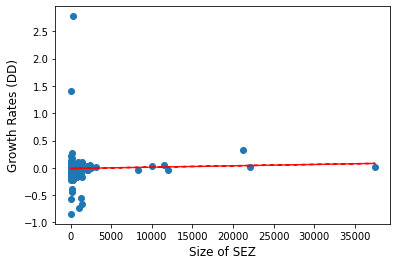

In [ ]:
# PLot the Data
plt.scatter(X, Y)
plt.xlabel('Size of SEZ', fontsize=12)
plt.ylabel('Growth Rates (DD)', fontsize=12)
z = np.polyfit(X, Y, 1)
p = np.poly1d(z)
plt.plot(X,p(X),"r--")
plt.show()

#### What do we see in this graph? 

* X- axis is the size of the SEZ's
* Y-axis is the growth rates, all values between -1 and +1, 0 indicating no change. 

You can see here that the variance is really large in this data set, so you are seeing extreme values in the Size of SEZ. We are also seeing that there is a collection of spot that tend to aggregate at 0 with many points that are negative.

The trend line on our graph doesnt show us a very good prediction line...

## Linear Regression Guide

1. Calculate Mean and Variance.
2. Calculate Covariance.
3. Estimate Coefficients.
4. Make Predictions.
5. Predict Insurance.

These steps will give you the foundation you need to implement and train simple linear regression models for your own prediction problems.

#### 1. Calculate Mean and Variance
The first step is to estimate the mean and the variance of both the input and output variables from the training data.

In [ ]:
# Mean of the input variables X 
# First way 
mean_x = np.sum(X) / len(X)
mean_x

610.1571072319202

In [ ]:
# Second way
mean_x = np.mean(X)
mean_x

610.1571072319202

In [ ]:
# Notice either way works

# Mean of the output variable Y 
# First way
mean_y = np.sum(Y) / len(Y)
# Second way
mean_y = np.mean(Y)
mean_y

-0.011272144965255361

The variance is the sum squared difference for each value from the mean value.

Variance for a list of numbers can be calculated as:

variance = sum( (x - mean(x))^2 )

In [ ]:
# This is how you calculate the variance
variance_x = np.sum((X - mean_x)**2)
variance_x

2754351345.1022444

### Function to Calculate Mean and Variance

In [ ]:
# Estimate Mean and Variance Using Functions
 
# Calculate the mean value of a list of numbers
def mean(values):
	return np.sum(values) / float(len(values))
 
# Calculate the variance of a list of numbers
def variance(values, mean):
	return np.sum([(x-mean)**2 for x in values])
 

In [ ]:
# Lets see these functions in practice
mean_x, mean_y = mean(X), mean(Y)
var_x, var_y = variance(X, mean_x), variance(Y, mean_y)

print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))

x stats: mean=610.157 variance=2754351345.102
y stats: mean=-0.011 variance=13.358


### 2. Calculate Covariance
The covariance of two groups of numbers describes how those numbers change together.

Covariance is a generalization of correlation. Correlation describes the relationship between two groups of numbers, whereas covariance can describe the relationship between two or more groups of numbers.

Additionally, covariance can be normalized to produce a correlation value.

Nevertheless, we can calculate the covariance between two variables as follows:

covariance = sum((x(i) - mean(x)) * (y(i) - mean(y)))

### Function for Covariance 
Below is a function named covariance() that implements this statistic. It builds upon the previous step and takes the lists of x and y values as well as the mean of these values as arguments.

In [ ]:
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar

In [ ]:
# Now lets see it in practice
mean_x, mean_y = mean(X), mean(Y)
covar = covariance(X, mean_x, Y, mean_y)
print('Covariance: %.3f' % (covar))

Covariance: 6884.580


We now have all the pieces in place to calculate the coefficients for our model.

### 3. Estimate Coefficients
We must estimate the values for two coefficients in simple linear regression.

In [ ]:
# The first is B1 which can be estimated as:
mean_x, mean_y = mean(X), mean(Y)
var_x, var_y = variance(X, mean_x), variance(Y, mean_y)
B1 = covariance(X, mean_x, Y, mean_y) / var_x
B1

2.4995284509628813e-06

In [ ]:
# Next, we calculate B0 using B1 
B0 = mean_y - B1 * mean_x
B0

-0.012797250014338757

In [ ]:
# Now lets create a function that gives us the Coefficients
def coefficients(X,Y):
	x_mean, y_mean = mean(X), mean(Y)
	b1 = covariance(X, x_mean, Y, y_mean) / variance(X, x_mean)
	b0 = y_mean - b1 * x_mean
	return [b0, b1]

In [ ]:
# Lets see this in practice 
print(coefficients(X,Y))

[-0.012797250014338757, 2.4995284509628813e-06]


### 4. Make Predictions
The simple linear regression model is a line defined by coefficients estimated from training data.

Once the coefficients are estimated, we can use them to make predictions.

The equation to make predictions with a simple linear regression model is as follows:


**y = b0 + b1 * x**

### Function for Linear Regression 
Below is a function named simple_linear_regression() that implements the prediction equation to make predictions on a test dataset. It also ties together the estimation of the coefficients on training data from the steps above.

The coefficients prepared from the training data are used to make predictions on the test data, which are then returned.

In [ ]:
def simple_linear_regression(X_train,Y_train, X_test):
  predictions = []
  b0, b1 = coefficients(list(X_train),list(Y_train))
  X_test = list(X_test)
  for i in range(len(X_test)):
     yhat = b0 + b1 * X_test[i]
     predictions.append(yhat)
  return predictions

In [ ]:
# This is used to split the data into training data and testing data
# test_size indicates the percentage of the data that will be portioned of data that will be used to test, the remaining percent will then 
# become training data. EX: A column of data has 100 rows, the test_size = 0.30 means 30 rows will be used in the test data, 
# and 70 rows will be used in the training data. 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


In [ ]:
# Now lets see this in practice
predictions = simple_linear_regression(X_train,Y_train, X_test)

# We've trained on only some of the data, and now we use that linear regression model to make predictions on the remaining data
predictions

[-0.008195164420707828,
 -0.008103139805426492,
 -0.008423639327613211,
 -0.007646189991615723,
 -0.008201510945899644,
 -0.008455371953572292,
 -0.00803967455350833,
 -0.006313419701334314,
 -0.006643439011308759,
 -0.008249109884838264,
 -0.008423639327613211,
 -0.00226116336635965,
 -0.008023808240528788,
 -0.007109908612907252,
 -0.008131699168789665,
 -0.007379635933559441,
 -0.008410946277229579,
 -0.007738214606897059,
 -0.007582724739697561,
 -0.007931783625247454,
 -0.008052367603891962,
 -0.008239590097050541,
 -0.008502970892510914,
 -0.008360174075695049,
 -0.00827449598560553,
 -0.005424906174480042,
 -0.00783658574737021,
 -0.007846105535157934,
 -0.004726788403380256,
 -0.00761763062825255,
 -0.0005063491508224618,
 -0.005742232434070854,
 -0.007544645588546664,
 -0.008217377258879183,
 -0.007366942883175809,
 -0.008080926967255136,
 -0.008030154765720604,
 -0.008471238266551833,
 -0.008455371953572292,
 -0.006900473281577316,
 -0.007052789886180905,
 -0.0060405191180862

Let’s pull together everything we have learned and make predictions for our simple contrived dataset.

As part of this example, we will also add in a function to manage the evaluation of the predictions called evaluate_algorithm() and another function to estimate the Root Mean Squared Error of the predictions called rmse_metric().

The full example is listed below.

In [ ]:
# Standalone simple linear regression example

# This splits our data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)





# Calculate root mean squared error, this calculates the erro of our predicition from the true values.
def rmse_metric(X_train,Y_train, X_test,B0,B1):

  # These are the actual values for X_test (calculated by running the input variable into original linear regression,
  # with the original coefficients)
  actual = []
  X_test = list(X_test)
  for i in range(len(X_test)):
    actual.append(B0 + B1*X_test[i])

  # These are our predictions on the X_test
  predicted = simple_linear_regression(X_train,Y_train, X_test)
  predicted = list(predicted)

 #Calculate the RMSE
  sum_error = 0
  for i in range(len(actual)):
    prediction_error = predicted[i] - actual[i]
    sum_error += (prediction_error ** 2)
 
  mean_error = sum_error / float(len(actual))
  rootmse = sqrt(mean_error)

  return actual, predicted, rootmse

# Evaluate regression algorithm on training dataset

# # Test simple linear regression
actual, predicted, rootmse = rmse_metric(X_train,Y_train, X_test,B0,B1)
print('RMSE: %.3f' % (rootmse))

RMSE: 0.005


In [ ]:
df_top16 = df1.copy()
df_top16 = df_top16[['city_300kdist','vat_sales','size','nearest_portdist','500kcity_range','city_500kdist','city_1mdist','decade_ofoperation',
'nearest_airportdist','populous_citydist','withholding','size_range','capex_duration','importduty_type','importduty_capex','export_min']]
df_top16.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 400
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city_300kdist        401 non-null    int64  
 1   vat_sales            401 non-null    object 
 2   size                 401 non-null    float64
 3   nearest_portdist     401 non-null    int64  
 4   500kcity_range       401 non-null    object 
 5   city_500kdist        401 non-null    int64  
 6   city_1mdist          401 non-null    int64  
 7   decade_ofoperation   401 non-null    object 
 8   nearest_airportdist  401 non-null    int64  
 9   populous_citydist    401 non-null    int64  
 10  withholding          401 non-null    object 
 11  size_range           401 non-null    object 
 12  capex_duration       401 non-null    object 
 13  importduty_type      401 non-null    object 
 14  importduty_capex     401 non-null    object 
 15  export_min           401 non-null    obj

In [ ]:
df_numeric = df_top16.select_dtypes(exclude=['object'])
df_numeric.head(3)

,city_300kdist,size,nearest_portdist,city_500kdist,city_1mdist,nearest_airportdist,populous_citydist
0,6,82.0,44,6,92,47,92
1,27,94.0,80,27,32,36,156
2,25,251.0,106,25,25,29,268


In [ ]:
def input_data(X,Y,i):
  independent_variables = np.array(X)
  dependent_variable = np.array(Y)
  X = independent_variables[:,i]
  Y = dependent_variable
  return X,Y

def variance(X):
  var_x = np.sum((X - np.mean(X))**2)
  return var_x

# Calculate Covariance.
def covariance(X,Y):
  mean_x, mean_y = np.mean(X), np.mean(Y)
  covar = 0.0
  for i in range(len(X)):
    covar += (X[i] - mean_x) * (Y[i] - mean_y)
  return covar

# Estimate Coefficients.
def coefficients(X,Y):
	mean_x, mean_y = np.mean(X), np.mean(Y)
	B1 = covariance(X,Y) / variance(X)
	B0 = mean_y - b1 * mean_x
	return B0, B1


# Make Predictions.
def simple_linear_regression(X_train,Y_train, X_test):
  predictions = []
  b0, b1 = coefficients(list(X_train),list(Y_train))
  X_test = list(X_test)
  for i in range(len(X_test)):
     yhat = b0 + b1 * X_test[i]
     predictions.append(yhat)
  return predictions

def split_data(X,Y,percent_test):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
  return X_train, X_test, Y_train, Y_test

# Calculate root mean squared error, this calculates the erro of our predicition from the true values.
def rmse_metric(X_train,Y_train, X_test,B0,B1):

  # These are the actual values for X_test (calculated by running the input variable into original linear regression,
  # with the original coefficients)
  actual = []
  X_test = list(X_test)
  for i in range(len(X_test)):
    actual.append(B0 + B1*X_test[i])

  # These are our predictions on the X_test
  predicted = simple_linear_regression(X_train,Y_train, X_test)
  predicted = list(predicted)

 #Calculate the RMSE
  sum_error = 0
  for i in range(len(actual)):
    prediction_error = predicted[i] - actual[i]
    sum_error += (prediction_error ** 2)
 
  mean_error = sum_error / float(len(actual))
  rootmse = sqrt(mean_error)

  return actual, predicted, rootmse

# Evaluate regression algorithm on training dataset

# PLot 
def plot_LR(X,Y):
  plt.scatter(X, Y)
  plt.xlabel('Independent Variable', fontsize=12)
  plt.ylabel('Growth Rates (DD)', fontsize=12)
  z = np.polyfit(X, Y, 1)
  p = np.poly1d(z)
  plt.plot(X,p(X),"r--")
  plt.show()

In [ ]:
def run_all(X,Y,i,percent_test):
  column_names = X.columns
  column_name = column_names[i]

  X,Y = input_data(X,Y,i)
  var_x = variance(X)
  B0,B1 = coefficients(X,Y)
  X_train, X_test, Y_train, Y_test = split_data(X,Y,percent_test)
  predictions = simple_linear_regression(X_train,Y_train, X_test)
  actual, predicted, rootmse = rmse_metric(X_train,Y_train, X_test,B0,B1)

  print("Linear Regression for Independent Variable " + column_name + " and Dependent Variable Growth Rates ")
  print("Root Mean Squared Error: " + str(rootmse))
  plot_LR(X,Y)

  return rootmse

Linear Regression for Independent Variable city_300kdist and Dependent Variable Growth Rates 
Root Mean Squared Error: 1.0351896049620783


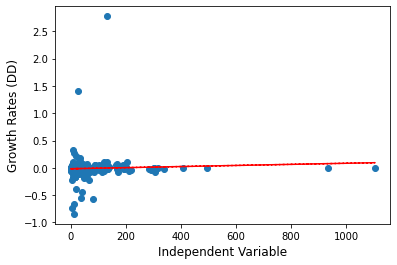

Linear Regression for Independent Variable size and Dependent Variable Growth Rates 
Root Mean Squared Error: 39.41471782719665


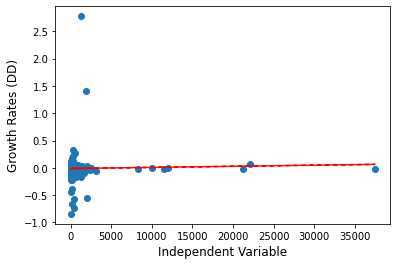

Linear Regression for Independent Variable nearest_portdist and Dependent Variable Growth Rates 
Root Mean Squared Error: 2.0685023653085355


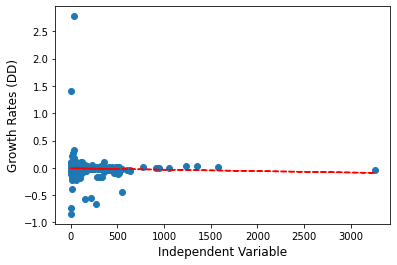

Linear Regression for Independent Variable city_500kdist and Dependent Variable Growth Rates 
Root Mean Squared Error: 0.8609633288203806


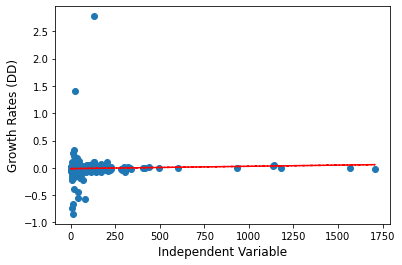

Linear Regression for Independent Variable city_1mdist and Dependent Variable Growth Rates 
Root Mean Squared Error: 2.5891354210902047


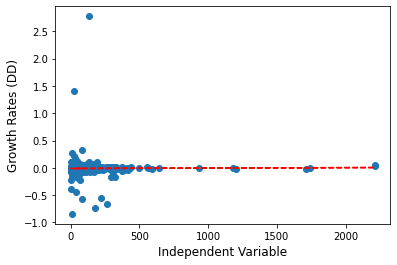

Linear Regression for Independent Variable nearest_airportdist and Dependent Variable Growth Rates 
Root Mean Squared Error: 1.7484400922562295


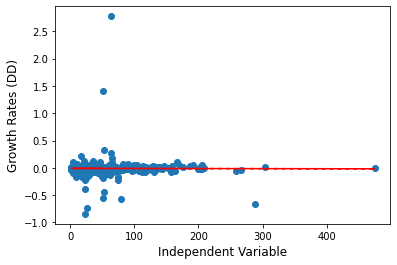

Linear Regression for Independent Variable populous_citydist and Dependent Variable Growth Rates 
Root Mean Squared Error: 16.20406890117572


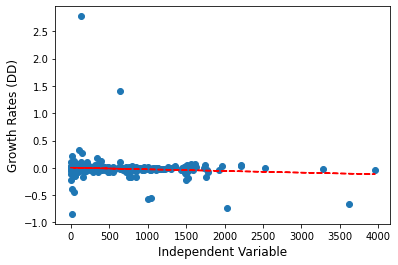

IndexError: ignored

In [ ]:
for i in range(len(df_numeric)):
  scores = []
  scores.append(run_all(df_numeric,growth_rates['DD'],i,.30))

scores